- Create folder name **_processed** in directory to extract image from video and excute function **video_to_frames**

- Create folder name **face detect** in directory to extract face from image and excute function **face_detect**

- Run function **check_image** and pass 1 image path to check

# Extract image from video

In [ ]:
import cv2
import time
import os

def video_to_frames(input_loc, output_loc, name_input):
    print(input_loc)
    # Log the time
    time_start = time.time()
    # Start capturing the feed
    cap = cv2.VideoCapture(input_loc)
   
    # Find the number of frames
    fps = cap.get(cv2.CAP_PROP_FPS)
    print("Frames per second", fps )
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 
    print ("Number of frames: ", video_length)
    
    count = 0
    pic_count = 0
    skip_frame = 15
    print ("Converting video..\n")
    
    # process path
    name_file = name_input.split(".")[0]
    output_path = output_loc + "/" + name_file
    os.mkdir(output_path)

    # Start converting the video
    while cap.isOpened():
        # Extract the frame
        ret, frame = cap.read()
        if not ret:
            continue
        # Write the results back to output location.
        if (count % skip_frame == 0 ):
          cv2.imwrite((output_path + "/" + f"img{str(pic_count)}" + ".jpg"), frame)
          pic_count +=1
        count = count + 1
        # If there are no more frames left
        if (count > (video_length-1)):
            # Log the time again
            time_end = time.time()
            # Release the feed
            cap.release()
            # Print stats
            print ("Done extracting frames.\n%d frames extracted" % pic_count)
            print ("It took %d seconds forconversion." % (time_end-time_start))
            break

In [ ]:
input_path = "/content/drive/MyDrive/Attendance Project/Video"
output_path = "/content/drive/MyDrive/Attendance Project/_processed"


In [ ]:
files = [f for f in os.listdir(input_path)]
for f in files:
  video_to_frames( (input_path + "/" + f) , output_path, f)

/content/drive/MyDrive/Attendance Project/Video/Tuấn.mp4
Frames per second 30.01523161007078
Number of frames:  536
Converting video..

Done extracting frames.
36 frames extracted
It took 4 seconds forconversion.
/content/drive/MyDrive/Attendance Project/Video/Trường.mp4
Frames per second 30.01399203010099
Number of frames:  414
Converting video..

Done extracting frames.
28 frames extracted
It took 4 seconds forconversion.
/content/drive/MyDrive/Attendance Project/Video/Linh.mp4
Frames per second 29.895282062830763
Number of frames:  354
Converting video..

Done extracting frames.
24 frames extracted
It took 4 seconds forconversion.
/content/drive/MyDrive/Attendance Project/Video/Hiếu.mp4
Frames per second 28.052263135282672
Number of frames:  518
Converting video..

Done extracting frames.
35 frames extracted
It took 5 seconds forconversion.
/content/drive/MyDrive/Attendance Project/Video/Quân.mp4
Frames per second 29.905097407704076
Number of frames:  957
Converting video..


# Face Detection using retinaface

In [ ]:
!pip install retina-face
from retinaface import RetinaFace

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=52bafb91370772be884528961625ff94c7fb5c1283c00f74015ab81fc8415d7a
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [ ]:
def face_detect(input_path, output_path):
  # Get all folder name in directory need to be process
  folder_name = os.listdir(input_path)

  # Loop for each folder
  pic_count = 0
  for f in folder_name:

    # Create folder path
    folder_path = input_path + "/" + f
    output = output_path + "/" + f
    os.mkdir(output)
    # Get all image in folder
    images_name = [img for img in os.listdir(folder_path)]
    for image_name in images_name:
      # Loop each image
      file_path = folder_path + "/" + image_name

      faces = RetinaFace.extract_faces(img_path = file_path , align = True)
      for face in faces:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        
        cv2.imwrite((output + "/" + f"img{str(pic_count)}" + ".jpg"), face)
        pic_count +=1
    print(f"Done {f}")        

In [ ]:
input = "/content/drive/MyDrive/Attendance Project/_processed"
output = "/content/drive/MyDrive/Attendance Project/face detect"
face_detect(input,output)

Done Hiếu
Done Tuấn
Done Trường
Done Linh
Done Quân
Done Xuân Anh
Done Tân
Done Đức
Done Kiên
Done Việt Đức
Done Hùng
Done Thắng
Done Vân
Done HĐức


# Using arcface extract embedding and calculate distance

In [ ]:
label_name = os.listdir("/content/drive/MyDrive/Attendance Project/face detect")

In [ ]:
len(label_name)

14

In [ ]:
label_name

['Hiếu',
 'Tuấn',
 'Trường',
 'Linh',
 'Quân',
 'Xuân Anh',
 'Tân',
 'Đức',
 'Kiên',
 'Việt Đức',
 'Hùng',
 'Thắng',
 'Vân',
 'HĐức']

In [ ]:
pip install arcface

In [ ]:
from arcface import ArcFace
face_rec = ArcFace.ArcFace()

In [ ]:
def extract_file_name(input_path):
  list_name_file = {}
  # Get all folder name in directory need to be process
  folder_name = os.listdir(input_path)

  # Loop for each folder
  for f in folder_name:

    # Create folder path
    folder_path = input_path + "/" + f
    # Get all image in folder
    images_name = [img for img in os.listdir(folder_path)]
    list_file_path = []
    for image_name in images_name:
      # Loop each image
      file_path = folder_path + "/" + image_name
      # Get all path of image in folder
      list_file_path.append(file_path) 

    # Add all file path to dictionary
    list_name_file[f] = list_file_path
  return list_name_file

In [ ]:
list_name_file = extract_file_name("/content/drive/MyDrive/Attendance Project/face detect")
list_name_file

{'Hiếu': ['/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img0.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img1.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img2.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img3.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img4.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img5.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img6.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img7.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img8.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img9.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img10.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img11.jpg',
  '/content/drive/MyDrive/Attendance Project/face detect/Hiếu/img12.jpg',
  '/content/

In [ ]:
def extract_embedding(input_dict):
  dict_emb = {}
  for i in input_dict.keys():
    dict_emb[i] = face_rec.calc_emb(list_name_file[i])
  return dict_emb 

In [ ]:
dict_emb = extract_embedding(list_name_file)

# Process input image to check

In [ ]:
def check_image(input_loc_image):
  # Read and plot image
  img = cv2.imread(input_loc_image)
  scale_percent = 40 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  img_resized = cv2.resize(img, dim )
  cv2_imshow(img_resized)  

  # Detect face from input image
  faces = RetinaFace.extract_faces(img_path = input_loc_image , align = True)
  for face in faces:
    face_detect = cv2.cvtColor(faces[0], cv2.COLOR_BGR2RGB)   
    cv2.imwrite("image_test.jpg", face_detect)
    emb = face_rec.calc_emb("image_test.jpg")
    
    name = "unknow"
  # Compair input image with image in database
  for k,v in dict_emb.items():
    # for item in dict_emb[i]:
      for values in v:
        # Function return distance using l2 norm
        distance = face_rec.get_distance_embeddings(emb,values)
        # print(k, distance)
        if distance < 0.8:
          name = k
          return name
        else:
          name = "unknow"
  return name




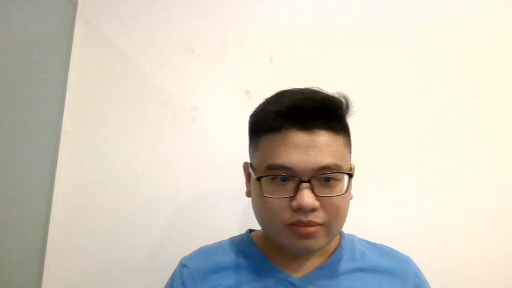

'Linh'

In [ ]:
check_image("/content/img11.jpg")